<a href="https://colab.research.google.com/github/leenago/Projects/blob/master/KDX/200928_KDX_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%B4%EC%96%B4%EB%B3%B4%EA%B8%B0_%EC%8B%A0%ED%95%9C%EC%82%BC%EC%84%B1%EC%B9%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.준비하기

## 1) 한글처리 패키지 설치

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2) Google Drive와 연동

In [2]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

MY_GOOGLE_DRIVE_PATH = 'My Drive/bigdata/아경/빅데이터 대회/KDX데이터' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive
Mounted at /content/drive
/content/drive/My Drive/bigdata/아경/빅데이터 대회/KDX데이터


In [3]:
%cd /content/drive/My Drive/bigdata/아경/빅데이터 대회/KDX데이터

/content/drive/My Drive/bigdata/아경/빅데이터 대회/KDX데이터


#2.데이터 열어보기

## 1) 신한카드 데이터

In [73]:
shinhan_card = pd.read_excel('Shinhancard.xlsx') ; shinhan_card.head()

,일별,성별,연령대별,업종,카드이용건수(천건),Unnamed: 5,Unnamed: 6,Unnamed: 7
0,20190101,F,20대,M001_한식,298.9,NaN,NaN,10.0
1,20190101,F,20대,M002_일식/중식/양식,88.3,NaN,NaN,NaN
2,20190101,F,20대,M003_제과/커피/패스트푸드,290.6,NaN,NaN,NaN
3,20190101,F,20대,M004_기타요식,446.3,NaN,NaN,NaN
4,20190101,F,20대,M005_유흥,24.2,NaN,NaN,NaN


In [74]:
#불필요한 column들 지우기
shinhan_card.drop(['Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1, inplace=True)
shinhan_card

,일별,성별,연령대별,업종,카드이용건수(천건)
0,20190101,F,20대,M001_한식,298.9
1,20190101,F,20대,M002_일식/중식/양식,88.3
2,20190101,F,20대,M003_제과/커피/패스트푸드,290.6
3,20190101,F,20대,M004_기타요식,446.3
4,20190101,F,20대,M005_유흥,24.2
...,...,...,...,...,...
195594,20200630,M,70대,M026_기타의료,1.7
195595,20200630,M,70대,M027_가전/가구,3.9
195596,20200630,M,70대,M028_자동차판매,0.2
195597,20200630,M,70대,M029_자동차서비스/용품,8.3


In [75]:
sh = shinhan_card.copy()

In [76]:
#column명을 삼성카드와 맞춰주기 
sh.columns=['소비일자','성별','연령대','소비업종','소비건수']
sh.head()

,소비일자,성별,연령대,소비업종,소비건수
0,20190101,F,20대,M001_한식,298.9
1,20190101,F,20대,M002_일식/중식/양식,88.3
2,20190101,F,20대,M003_제과/커피/패스트푸드,290.6
3,20190101,F,20대,M004_기타요식,446.3
4,20190101,F,20대,M005_유흥,24.2


In [77]:
#소비건수 데이터 맞춰주기
sh['소비건수'] = sh['소비건수']*1000

In [78]:
#'A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead' 라는 오류가 계속 떠서 꺼놓는 기능
pd.options.mode.chained_assignment = None

In [79]:
#성별 표기 바꿔주기
for indx, gender in enumerate(sh['성별']):
  if gender == 'F':
    sh['성별'][indx] = '여성'

  else:
    sh['성별'][indx] = '남성'

In [80]:
sh['성별'].value_counts()

남성    97812
여성    97787
Name: 성별, dtype: int64

### (1)연령대별

In [81]:
shinhan_card[shinhan_card.업종 == 'M010_음/식료품']['연령대별'].value_counts()

60대    1094
20대    1094
30대    1094
50대    1094
40대    1094
70대    1094
Name: 연령대별, dtype: int64

In [82]:
shinhan_card[shinhan_card.업종 == 'M003_제과/커피/패스트푸드']['연령대별'].value_counts()
#나머지 업종별 연령대 value는 다 똑같았다.

60대    1094
20대    1094
30대    1094
50대    1094
40대    1094
70대    1094
Name: 연령대별, dtype: int64

In [83]:
shinhan_card[shinhan_card.업종 == 'M028_자동차판매']['연령대별'].value_counts()
#연령대별 자동차 판매 카테고리에서 70대의 소비가 가장 적었다.

20대    1094
30대    1094
50대    1094
40대    1094
60대    1093
70대    1051
Name: 연령대별, dtype: int64

In [84]:
shinhan_card[shinhan_card.업종 == 'M022_유아교육']['연령대별'].value_counts()
#연령대별 유아교육 카테고리 소비는 30-40대가 가장 많았다.

30대    1093
40대    1093
20대    1068
50대     952
60대     724
70대     358
Name: 연령대별, dtype: int64

### (2)성별

In [85]:
shinhan_card[shinhan_card.업종 == 'M004_기타요식']['성별'].value_counts()
#성별에도 차이가 없음

M    3282
F    3282
Name: 성별, dtype: int64

In [86]:
shinhan_card[shinhan_card.업종 == 'M022_유아교육']['성별'].value_counts()
#M의 데이터가 더 많음

M    2646
F    2642
Name: 성별, dtype: int64

In [87]:
shinhan_card[shinhan_card.업종 == 'M028_자동차판매']['성별'].value_counts()
#M의 데이터가 더 많음

M    3270
F    3250
Name: 성별, dtype: int64

### (3)업종별 카드 이용건수

In [88]:
sh[['소비업종','소비건수']].groupby('소비업종').sum()

,소비건수
소비업종,
M001_한식,2.007231e+09
M002_일식/중식/양식,4.287391e+08
M003_제과/커피/패스트푸드,1.218783e+09
M004_기타요식,1.948907e+09
M005_유흥,6.783940e+07
M006_백화점,3.228217e+08
M007_할인점/슈퍼마켓,3.494946e+09
M008_편의점,3.226012e+09
M009_기타유통,2.898002e+08


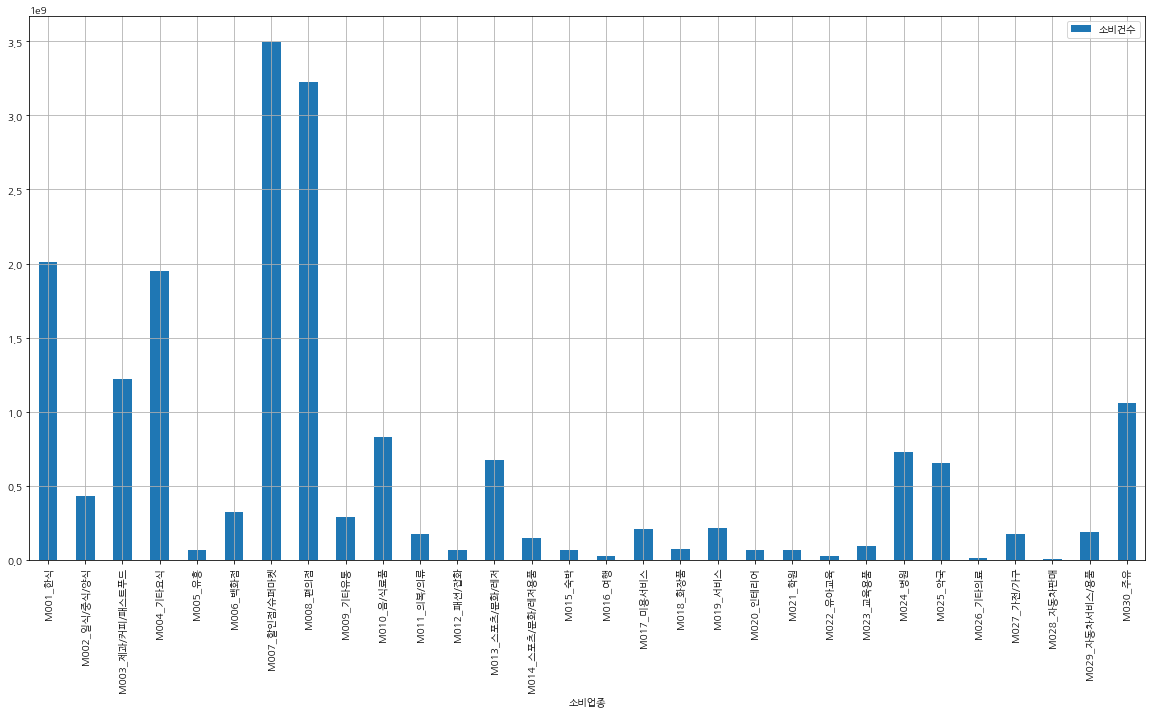

In [89]:
sh_cate_use = sh[['소비업종','소비건수']]
new_sh_cate_use = sh_cate_use.groupby('소비업종').sum()
new_sh_cate_use.plot.bar()
plt.grid(True)
plt.rcParams['figure.figsize']= (20,10)

plt.legend()
plt.show()

## 2) 신한카드의 데이터를 삼성카드와 맞춰주기

In [90]:
sh['소비업종'][1]

'M002_일식/중식/양식'

In [91]:
#내부 데이터 바꾸기 (replace를 이용해서)
eat_sh = sh[sh['소비업종'].isin(['M001_한식','M002_일식/중식/양식','M003_제과/커피/패스트푸드','M004_기타요식','M005_유흥'])]
eat_sh = eat_sh.replace(['M001_한식','M002_일식/중식/양식','M003_제과/커피/패스트푸드','M004_기타요식','M005_유흥'],'요식/유흥')
eat_sh

,소비일자,성별,연령대,소비업종,소비건수
0,20190101,여성,20대,요식/유흥,298900.0
1,20190101,여성,20대,요식/유흥,88300.0
2,20190101,여성,20대,요식/유흥,290600.0
3,20190101,여성,20대,요식/유흥,446300.0
4,20190101,여성,20대,요식/유흥,24200.0
...,...,...,...,...,...
195569,20200630,남성,70대,요식/유흥,68600.0
195570,20200630,남성,70대,요식/유흥,9200.0
195571,20200630,남성,70대,요식/유흥,18300.0
195572,20200630,남성,70대,요식/유흥,24400.0


In [92]:
home_sh = sh[sh['소비업종'].isin(['M027_가전/가구','M020_인테리어'])]
home_sh = home_sh.replace(['M027_가전/가구','M020_인테리어'],'가전/가구')
home_sh

,소비일자,성별,연령대,소비업종,소비건수
19,20190101,여성,20대,가전/가구,1300.0
26,20190101,여성,20대,가전/가구,18400.0
49,20190101,여성,30대,가전/가구,2200.0
56,20190101,여성,30대,가전/가구,13300.0
79,20190101,여성,40대,가전/가구,2700.0
...,...,...,...,...,...
195535,20200630,남성,50대,가전/가구,25000.0
195558,20200630,남성,60대,가전/가구,17100.0
195565,20200630,남성,60대,가전/가구,11100.0
195588,20200630,남성,70대,가전/가구,4000.0


In [93]:
#위에서 한 작업을, for문을 이용하여 한번에 분류해준다.

for indx, category in enumerate(sh['소비업종']):
  if (category == 'M020_인테리어' or category == 'M027_가전/가구'):
    sh['소비업종'][indx] = '가전/가구'

  elif (category in ['M009_기타유통','M010_음/식료품','M019_서비스']):
    sh['소비업종'][indx] = '가정생활/서비스'
  
  elif (category in ['M021_학원','M022_유아교육','M023_교육용품']):
    sh['소비업종'][indx]='교육/학원'
  
  elif (category in ['M017_미용서비스','M018_화장품']):
    sh['소비업종'][indx]='미용'
  
  elif (category in ['M006_백화점']):
    sh['소비업종'][indx]='백화점/상품권/아울렛'

  elif (category in ['M013_스포츠/문화/레저','M014_스포츠/문화/레저용품']):
    sh['소비업종'][indx]='스포츠/문화/레저'
  
  elif (category in ['M015_숙박','M016_여행']):
    sh['소비업종'][indx] = '여행/교통'

  elif (category in ['M001_한식','M002_일식/중식/양식','M003_제과/커피/패스트푸드','M004_기타요식','M005_유흥']):
    sh['소비업종'][indx] = '요식/유흥'

  elif (category in ['M024_병원','M025_약국','M026_기타의료']):
    sh['소비업종'][indx] = '의료'

  elif (category in ['M028_자동차판매','M029_자동차서비스/용품']):
    sh['소비업종'][indx] = '자동차'

  elif (category in ['M030_주유']):
    sh['소비업종'][indx] = '주유'

  elif (category in ['M011_의복/의류','M012_패션/잡화']):
    sh['소비업종'][indx] = '패션/잡화'

  elif (category in ['M008_편의점']):
    sh['소비업종'][indx] = '편의점'

  elif (category in ['M007_할인점/슈퍼마켓']):
    sh['소비업종'][indx] = '할인점/슈퍼마켓'


In [94]:
#분류한 데이터를 가지고 시각화를 해주는 함수를 만든다.

def categorical(category = '요식/유흥'):
  category_df = sh[sh.소비업종 == category]
  category_df_date = category_df.loc[:'소비일자'].astype('str')
  category_df['월'] = [x[:6] for x in category_df_date['소비일자']]
  new_df = pd.DataFrame(category_df[['월','성별','소비건수']].groupby(['월','성별'])['소비건수'].sum())
  new_df.reset_index(inplace=True)
  plt.rcParams["figure.figsize"] = (20,5)
  sns.barplot(data=new_df,x="월", y="소비건수",hue="성별")
  plt.xticks(rotation=45)
  return plt.show()

요식/유흥


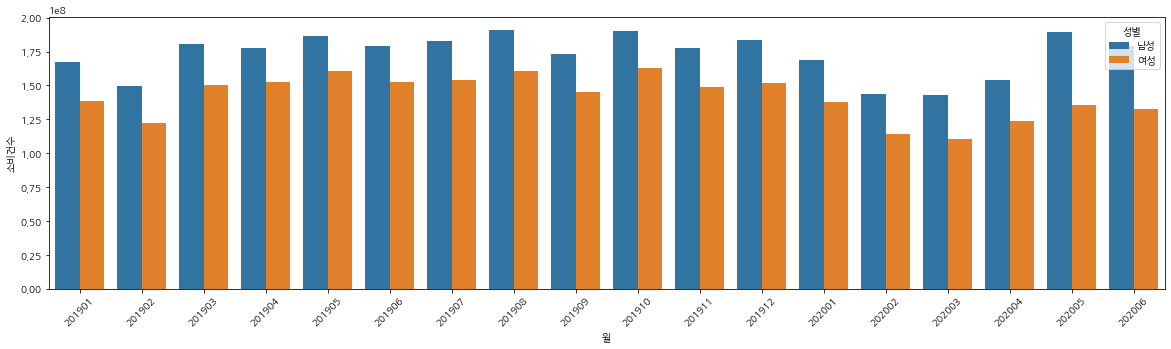

None


가정생활/서비스


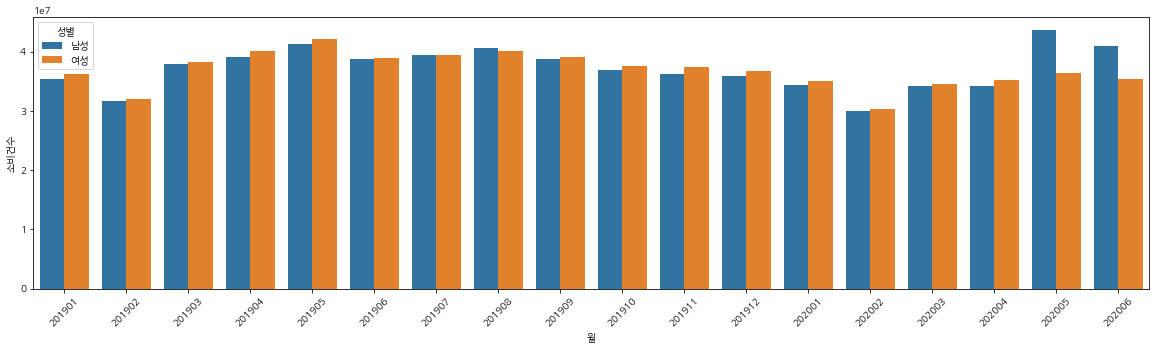

None


의료


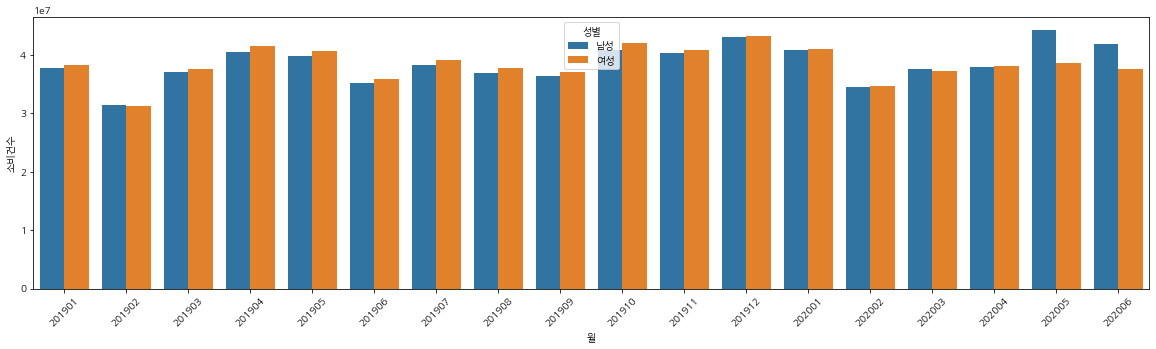

None


교육/학원


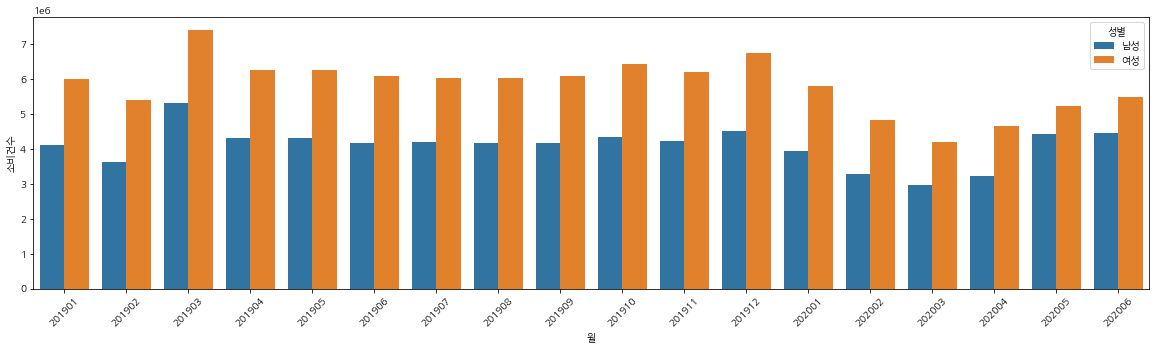

None


백화점/상품권/아울렛


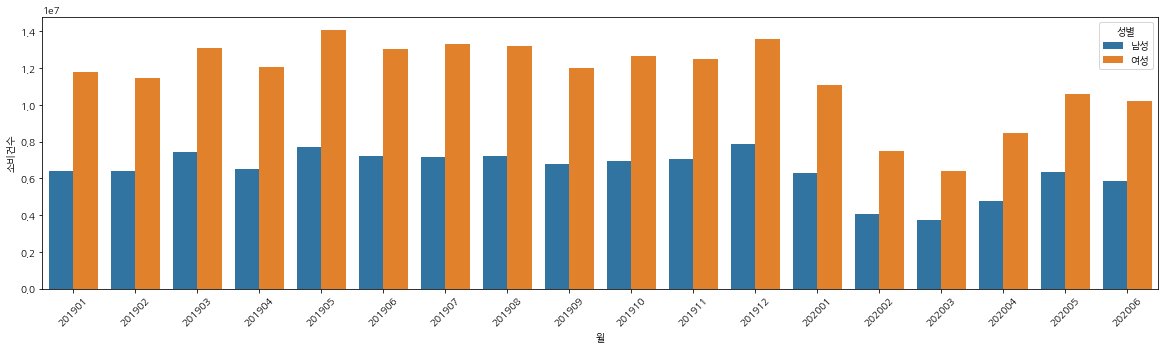

None


스포츠/문화/레저


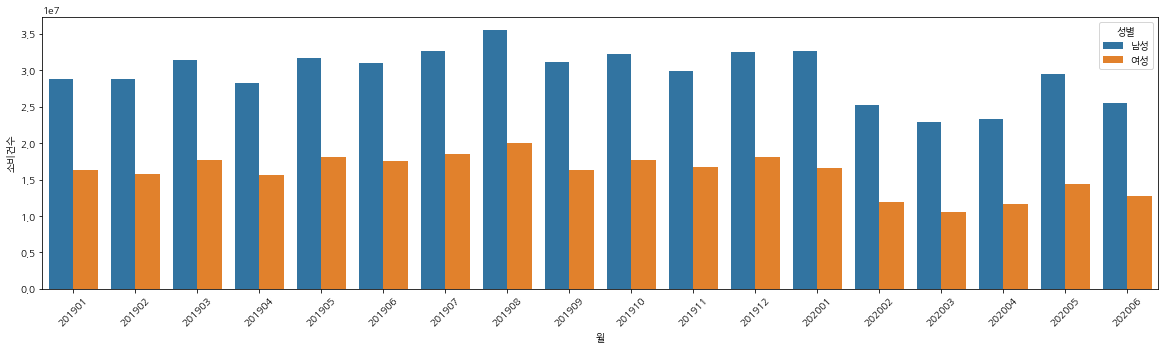

None


패션/잡화


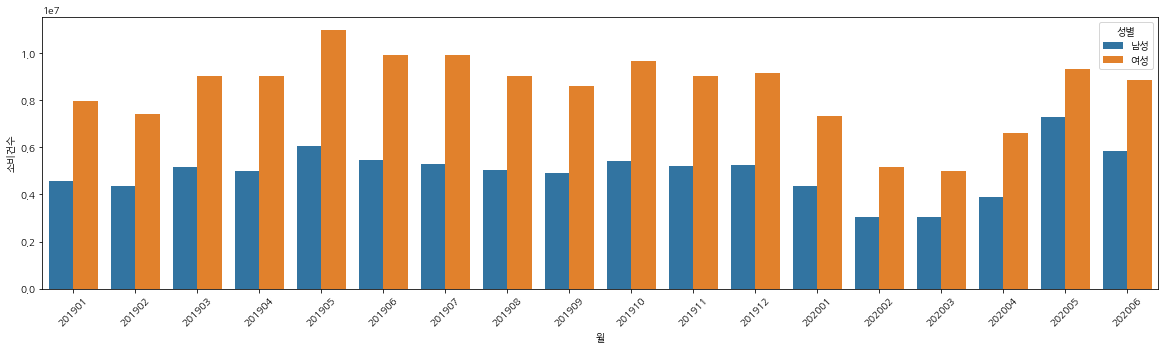

None


가전/가구


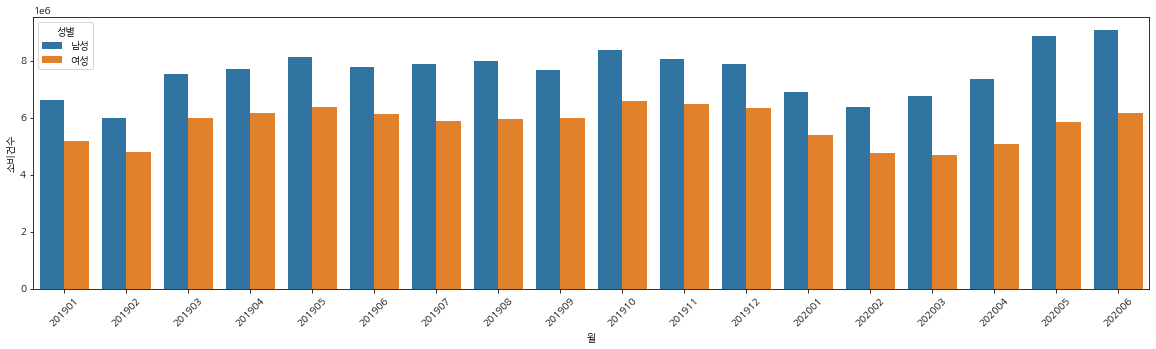

None


미용


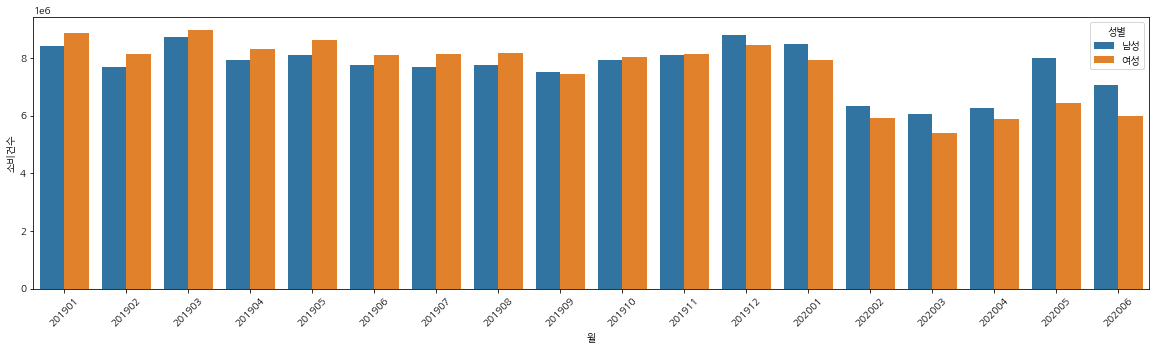

None


자동차


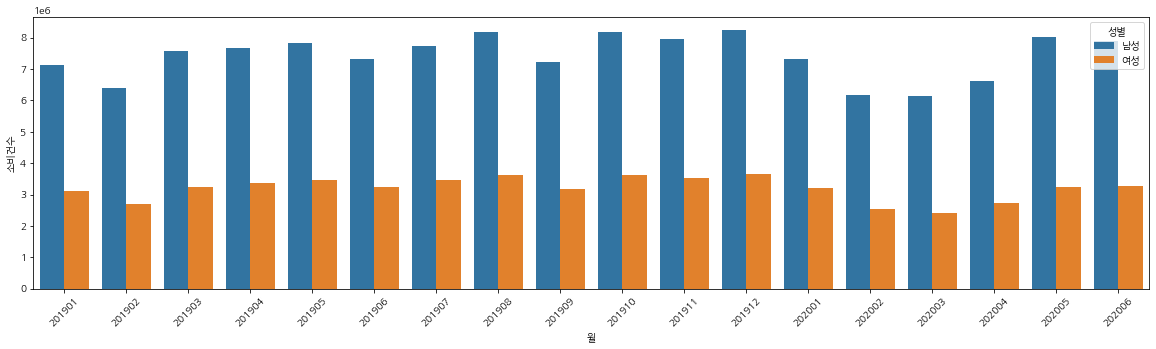

None


주유


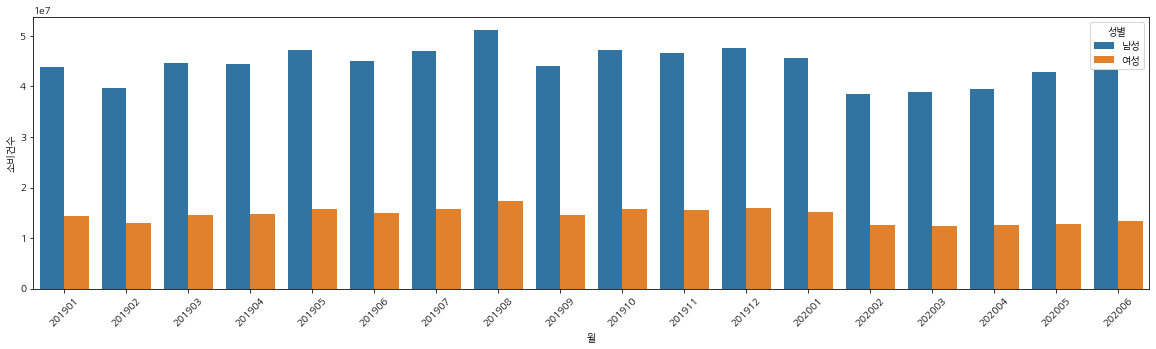

None


할인점/슈퍼마켓


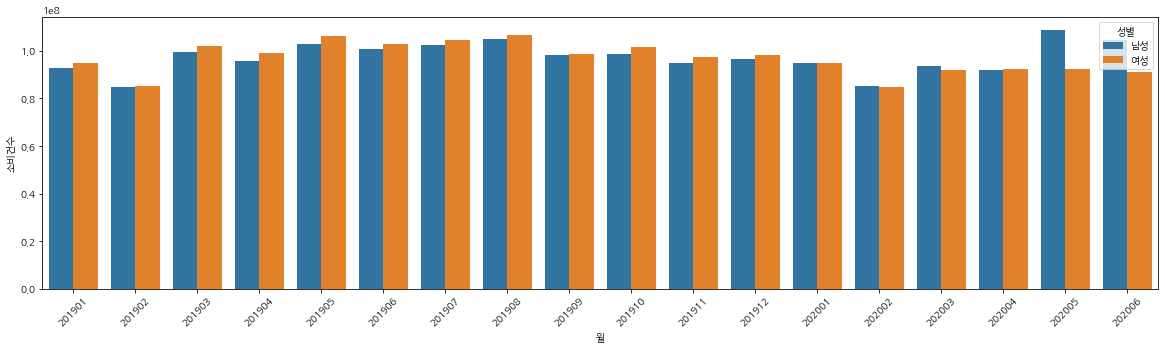

None


편의점


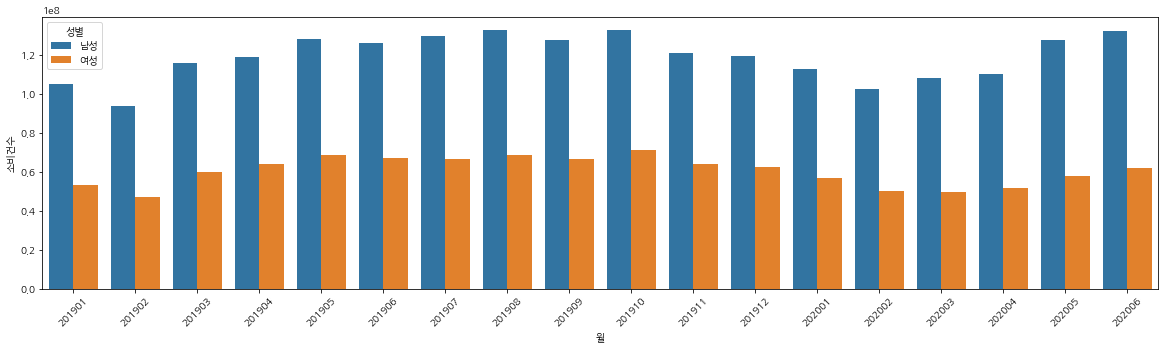

None


In [99]:
print('요식/유흥')
print(categorical('요식/유흥'))
print('\n')
print('가정생활/서비스')
print(categorical('가정생활/서비스'))
print('\n')
print('의료')
print(categorical('의료'))
print('\n')
print('교육/학원')
print(categorical('교육/학원'))
print('\n')
print('백화점/상품권/아울렛')
print(categorical('백화점/상품권/아울렛'))
print('\n')
print('스포츠/문화/레저')
print(categorical('스포츠/문화/레저'))
print('\n')
print('패션/잡화')
print(categorical('패션/잡화'))
print('\n')
print('가전/가구')
print(categorical('가전/가구'))
print('\n')
print('미용')
print(categorical('미용'))
print('\n')
print('자동차')
print(categorical('자동차'))
print('\n')
print('주유')
print(categorical('주유'))
print('\n')
print('할인점/슈퍼마켓')
print(categorical('할인점/슈퍼마켓'))
print('\n')
print('편의점')
print(categorical('편의점'))


- 대체로 202003 즈음에 많은 카테고리의 소비건수가 줄었다. 반면 **할인점/슈퍼마켓**, **편의점**은 크게 영향을 받지 않았다.
- **주유**, **스포츠/문화/레저**, **자동차**,**편의점**은 남성의 소비건수가 여성에 비해 매우 많았고, **요식/유흥**,**가전/가구**는 남성의 소비건수가 여성에 비해 조금 많았다.
- **교육/학원**,**백화점/상품권/아울렛**,**패션/잡화**의 경우, 여성의 소비건수가 남성에 비해 매우 많았다.

### 삼성카드 데이터와 머징



In [96]:
#삼성카드 데이터 불러오기
samsung_card = pd.read_csv('Samsungcard.csv', encoding="CP949")
samsung_card.head()
samsung_card.tail()

,소비일자,소비업종,성별,연령대,소비건수
76575,20200630,할인점/마트,여성,20대,142108
76576,20200630,할인점/마트,여성,30대,388196
76577,20200630,할인점/마트,여성,40대,593836
76578,20200630,할인점/마트,여성,50대,552912
76579,20200630,할인점/마트,여성,60대,339458


In [97]:
#삼성카드 데이터와 신한카드 데이터를 concat 시키기
sm = samsung_card.copy()
samsung_shinhan = pd.concat([sm,sh])
samsung_shinhan.tail()

,소비일자,소비업종,성별,연령대,소비건수
195594,20200630,의료,남성,70대,1700.0
195595,20200630,가전/가구,남성,70대,3900.0
195596,20200630,자동차,남성,70대,200.0
195597,20200630,자동차,남성,70대,8300.0
195598,20200630,주유,남성,70대,94500.0


In [98]:
#merge한 데이터를 csv 파일로 변환해서 드라이브에 저장
samsung_shinhan.to_csv('/content/drive/My Drive/bigdata/아경/빅데이터 대회/KDX데이터/samsung_shinhan_merge.csv')